# SEIRV

This example is taken from the documentation of the R package
[`epidemics`](https://github.com/epiverse-trace/epidemics/blob/main/vignettes/epidemics.Rmd).

In [ ]:
# load epidemics
library(epidemics)
library(socialmixr)


Attaching package: 'socialmixr'

The following object is masked from 'package:utils':

    cite

In [ ]:
# load contact and population data from socialmixr::polymod
polymod <- socialmixr::polymod
contact_data <- socialmixr::contact_matrix(
  polymod,
  countries = "United Kingdom",
  age.limits = c(0, 20, 40),
  symmetric = TRUE
)

Using POLYMOD social contact data. To cite this in a publication, use the 'cite' function

Removing participants that have contacts without age information. To change this behaviour, set the 'missing.contact.age' option

In [ ]:
# initial conditions: one in every 1 million is infected
initial_i <- 1e-6
initial_conditions <- c(
  S = 1 - initial_i, E = 0, I = initial_i, R = 0, V = 0
)

# build for all age groups
initial_conditions <- rbind(
  initial_conditions,
  initial_conditions,
  initial_conditions
)
rownames(initial_conditions) <- rownames(contact_matrix)

In [ ]:
uk_population <- population(
  name = "UK",
  contact_matrix = contact_matrix,
  demography_vector = demography_vector,
  initial_conditions = initial_conditions
)

In [ ]:
# simulate a pandemic, with an R0,
# an infectious period, and an pre-infectious period
pandemic_influenza <- infection(
  r0 = 1.5,
  preinfectious_period = 3,
  infectious_period = 7
)

pandemic_influenza

<infection>
infection name: NA
R0: 1.5
Infectious period: 7
Other infection parameters:
"preinfectious_period"

In [ ]:
# run an epidemic model using `epidemic()`
system.time(output <- epidemic(
  model = "default",
  population = uk_population,
  infection = pandemic_influenza,
  time_end = 600, increment = 1.0
))

   user  system elapsed 
  0.010   0.001   0.011 

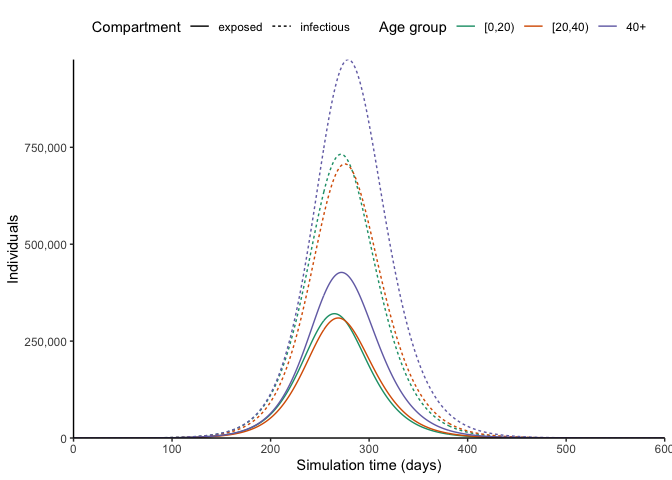

In [ ]:
# plot figure of epidemic curve
ggplot(
  output[compartment %in% c("exposed", "infectious")],
  aes(
    x = time,
    y = value,
    col = demography_group,
    linetype = compartment
  )
) +
  geom_line() +
  scale_y_continuous(
    labels = scales::comma
  ) +
  scale_colour_brewer(
    palette = "Dark2",
    name = "Age group"
  ) +
  expand_limits(
    y = c(0, 500e3)
  ) +
  coord_cartesian(
    expand = FALSE
  ) +
  theme_classic() +
  theme(
    legend.position = "top"
  ) +
  labs(
    x = "Simulation time (days)",
    linetype = "Compartment",
    y = "Individuals"
  )